# Census Income

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score
import warnings
warnings.filterwarnings('ignore')

In [34]:
df_census=pd.read_csv('Census Income.csv')

In [35]:
df_census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
df_census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [37]:
df_census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [38]:
df_census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<Axes: >

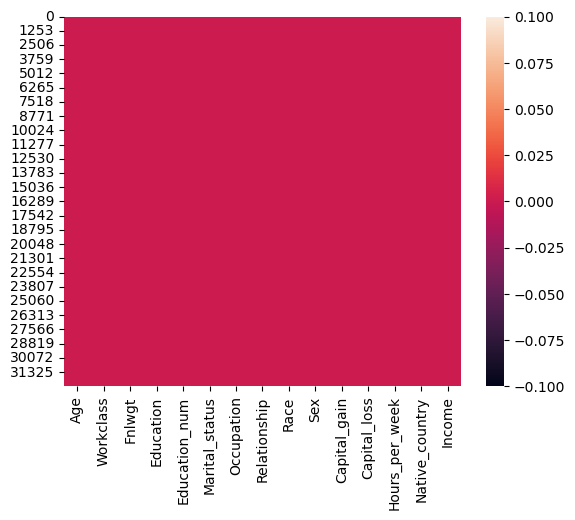

In [39]:
sns.heatmap(df_census.isnull())

In [40]:
df_census.drop(['Race','Sex'],axis=1,inplace=True)

In [41]:
df_census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,<=50K


In [42]:
label_encoder = LabelEncoder()

In [43]:
df_census['Workclass'] = label_encoder.fit_transform(df_census['Workclass'])

In [44]:
df_census['Education'] = label_encoder.fit_transform(df_census['Education'])

In [45]:
df_census['Marital_status'] = label_encoder.fit_transform(df_census['Marital_status'])

In [46]:
df_census['Occupation'] = label_encoder.fit_transform(df_census['Occupation'])

In [47]:
df_census['Relationship'] = label_encoder.fit_transform(df_census['Relationship'])

In [48]:
df_census['Native_country'] = label_encoder.fit_transform(df_census['Native_country'])

In [49]:
df_census['Income'] = label_encoder.fit_transform(df_census['Income'])

In [50]:
df_census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,0,0,20,39,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
x=df_census.iloc[:,0:-1]

In [54]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,0,0,13,39
1,38,4,215646,11,9,0,6,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,0,0,40,39
3,28,4,338409,9,13,2,10,5,0,0,40,5
4,37,4,284582,12,14,2,4,5,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,0,0,38,39
32556,40,4,154374,11,9,2,7,0,0,0,40,39
32557,58,4,151910,11,9,6,1,4,0,0,40,39
32558,22,4,201490,11,9,4,1,3,0,0,20,39


In [57]:
y=df_census.iloc[:,-1]

In [58]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
pred_y = model.predict(x_test)

In [63]:
pred_y

array([ 0.08457215,  0.06525805,  0.43632932, ..., -0.15529228,
        0.14591032,  0.51928475])

In [66]:
r2Score = r2_score(y_test,pred_y)

In [67]:
print("R2 Score :: ",round(r2Score,2))

R2 Score ::  0.25


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
model_max = LinearRegression()

In [70]:
param_grids_max = {
    'fit_intercept': [True, False]
}

In [71]:
grid_search_max = GridSearchCV(model_max,param_grids_max , cv=5, scoring='neg_mean_squared_error')

In [73]:
grid_search_max.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [74]:
best_model_max = grid_search_max.best_estimator_
best_params_max = grid_search_max.best_params_

In [75]:
print("Best hyperparameters:", best_params_max)

Best hyperparameters: {'fit_intercept': True}


In [76]:
best_model_max.fit(x_train, y_train)

LinearRegression()

In [78]:
pred_y_max = best_model_max.predict(x_test)

In [79]:
best_score_max = grid_search_max.best_score_
print("Best score:", best_score_max)

Best score: -0.13633655909383885


In [80]:
positive_mse_max = -best_score_max

In [81]:
print("Positive mean squared error:", positive_mse_max)

Positive mean squared error: 0.13633655909383885
